In [1]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from tensorflow import keras
from keras import layers,models
from keras.layers import Dropout
import matplotlib.pyplot as plt
import matplotlib.image as img
#https://zhuanlan.zhihu.com/p/134149111

In [22]:
#immature_all 332
#train and test 299(90%) 149(our) 150(kaggle)
#val 33(10%) 16(kaggle) 17(our)

x_list = []
y_list = []
x_train = []
y_train = []
x_valid = []
y_valid = []
#test good=> 100 + 2177/5 ,bad=> 12 + 239/3
dir_path = r'D:\VSCode_files\Coffee_project\coffee\archive\immature_train_and_test'
img_filenames = os.listdir(dir_path) 

for img_filename in img_filenames:
    img_nparray = np.array(Image.open(f'{dir_path}\\{img_filename}'))
    for i in range(3):
        #img_nparray[i] = preprocessing.normalize(img_nparray[i],norm='l1')
        img_nparray[i] = preprocessing.scale(img_nparray[i])
        
    x_list.append(img_nparray)
    
    if img_filename[0]=='g':
        y_list.append(0)
    else:
        y_list.append(1)

y_list = keras.utils.to_categorical(y_list, num_classes=2)
x_train, x_valid, y_train, y_valid = train_test_split(x_list, y_list, random_state=20, stratify=y_list)
# print(np.array(x_train))

In [23]:
# model = models.Sequential()
# model.add(layers.Conv2D(6, kernel_size=(5, 5),kernel_regularizer=tf.keras.regularizers.l1(0.01), activation='relu', input_shape=(224,224,3)))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))  #floor(224/2)+1 => 110*110
# model.add(layers.Conv2D(16, kernel_size=(5, 5),kernel_regularizer=tf.keras.regularizers.l1(0.01), activation='relu')) #95x95
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))  #floor(95/2)+1 => 48x48
# model.add(layers.Flatten())
# model.add(layers.Dense(120, activation='relu'))
# model.add(layers.Dense(84, activation='relu'))
# model.add(layers.Dense(2, activation='softmax'))
model = models.Sequential()
model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(224,224,3))) #kernel_regularizer=tf.keras.regularizers.l1(0.01)
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(16, kernel_size=(5, 5),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
# model = models.Sequential()
# model.add(layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(units=4096,activation="relu"))
# model.add(layers.Dense(units=4096,activation="relu"))
# model.add(layers.Dense(units=2, activation="softmax"))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 6)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 44944)             0         
                                                                 
 dense_3 (Dense)             (None, 120)              

Epoch 1/10
14/14 [==============================] - 6s 389ms/step - loss: 268.6958 - accuracy: 0.6440 - val_loss: 11.8897 - val_accuracy: 0.4932
Epoch 2/10
14/14 [==============================] - 5s 379ms/step - loss: 6.7037 - accuracy: 0.7211 - val_loss: 2.8486 - val_accuracy: 0.6824
Epoch 3/10
14/14 [==============================] - 5s 394ms/step - loss: 0.4846 - accuracy: 0.9297 - val_loss: 0.5816 - val_accuracy: 0.9122
Epoch 4/10
14/14 [==============================] - 6s 439ms/step - loss: 0.0876 - accuracy: 0.9841 - val_loss: 0.0564 - val_accuracy: 0.9662
Epoch 5/10
14/14 [==============================] - 7s 514ms/step - loss: 0.0040 - accuracy: 0.9977 - val_loss: 0.0533 - val_accuracy: 0.9797
Epoch 6/10
14/14 [==============================] - 8s 558ms/step - loss: 5.7466e-04 - accuracy: 1.0000 - val_loss: 0.0526 - val_accuracy: 0.9797
Epoch 7/10
14/14 [==============================] - 8s 568ms/step - loss: 2.3385e-04 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 0.

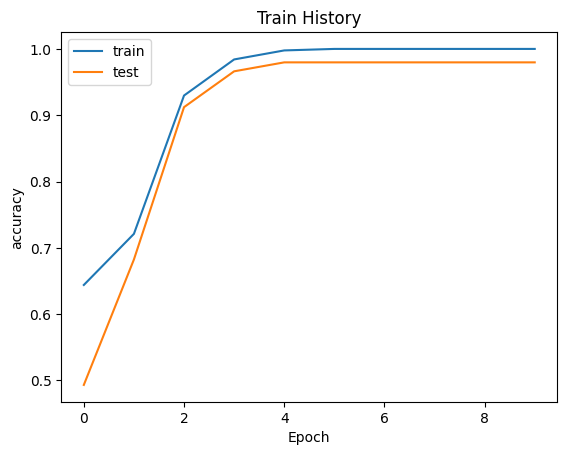

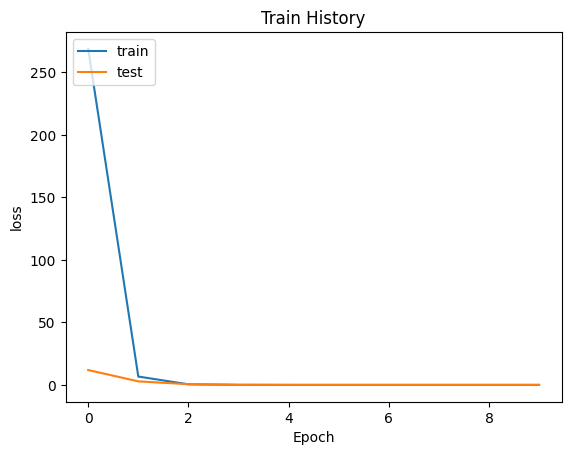

In [24]:
train_history = model.fit(np.array(x_train), np.array(y_train), batch_size=32, epochs=10, verbose=1, validation_data=(np.array(x_valid), np.array(y_valid)))
 
loss, accuracy = model.evaluate(np.array(x_valid), np.array(y_valid), verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(train_acc)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')


In [27]:
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.metrics import confusion_matrix,classification_report

classify_type = 2
folderPath = r'D:\VSCode_files\Coffee_project\coffee\archive\immature_val'
filenames = os.listdir(folderPath)

ans_y = []
pred_y = []
for img_filename in filenames:
    img_array = np.expand_dims(np.array(Image.open(f'{folderPath}\\{img_filename}')),axis=0)
    if img_filename[0]=='i':
        ans_y.append(1)
    else:
        ans_y.append(0)

    pred_res = model.predict(img_array, verbose=0)[0]
    for i in range(classify_type):
        if(pred_res[i] == max(pred_res)):
            pred_y.append(i)

print(ans_y)
print(pred_y)

print("confusion_matrix:\n",confusion_matrix(ans_y, pred_y))
print(classification_report(ans_y,pred_y))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
confusion_matrix:
 [[33  0]
 [ 0 26]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        26

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [35]:
# model.save('immature.h5')

In [34]:
print(np.array(Image.open(r"D:\VSCode_files\Coffee_project\coffee\archive\immature_train_and_test\green (1).png")).shape)
print(np.array(Image.open(r"C:\Users\User\Downloads\backup_immature\immature1.png")).shape)

(224, 224, 3)
(224, 224, 4)
